# EEG视频分析相关进展

## 导入相关库

In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import graphviz

In [2]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [3]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

## 数据读取

In [75]:
data = pd.read_csv("EEGVi.csv", encoding="utf-8")
data

,Serial number,Name,Gender,Aggression,Stress,Tension,Suspect,Balance,Charm,Energy,Self-Regulation,Inhibition,Neuroticism,Grouping,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1,李金武,男,3.39716,9.30878,35.3604,11.93990,18.79110,4.20310,4.67536,6.52590,22.12840,30.1678,正常,NaN,NaN,NaN
1,2,张超,男,7.33143,18.72920,135.5730,20.12340,12.15850,7.66514,5.36317,4.14930,15.81670,42.5779,正常,NaN,NaN,NaN
2,3,谢潇霏,女,20.61320,27.24110,90.8483,18.88760,16.62660,27.46970,17.79410,18.18110,16.39510,24.2687,正常,NaN,NaN,NaN
3,4,孙敬轩,女,8.20802,17.61510,47.8971,15.44570,13.05150,21.22690,5.49463,9.58204,12.07390,27.2830,正常,NaN,NaN,NaN
4,5,吴绍汘,男,14.82110,18.46160,70.8906,9.12752,22.70230,6.96203,17.77170,9.56488,20.06370,31.5428,正常,NaN,NaN,NaN
5,6,李龙奎,男,2.65265,8.81672,27.2261,5.62565,14.81420,4.20996,4.09207,5.89711,18.99700,31.9490,正常,NaN,NaN,NaN
6,7,马俊鹏,男,20.33590,24.34110,13.7585,14.35830,15.22520,14.55380,22.23850,13.71010,20.69570,27.1275,正常,NaN,NaN,NaN
7,8,王雅萱,女,4.46128,3.83714,23.9598,10.76070,16.00480,1.92843,15.30260,6.10165,10.59380,41.0068,正常,NaN,NaN,NaN
8,9,刘双杰,女,4.05985,2.56780,26.8263,11.44610,10.35200,2.84013,2.76847,4.25609,14.02140,32.6359,正常,NaN,NaN,NaN
9,10,孙峻伟,男,7.27447,9.55003,27.3617,7.29782,6.12692,2.53915,13.58240,3.60505,12.65640,34.9948,正常,NaN,NaN,NaN


In [76]:
data.Grouping.replace(['正常','癫痫'], [0, 1], inplace=True)

In [77]:
feature_name = ['Aggression', 'Stress', 'Tension',
       'Suspect', 'Balance', 'Charm', 'Energy', 'Self-Regulation',
       'Inhibition', 'Neuroticism']
label_name = ['Grouping']

## 特征分布可视化

In [78]:
data_0 = data[data['Grouping']==0]
data_1 = data[data['Grouping']==1]

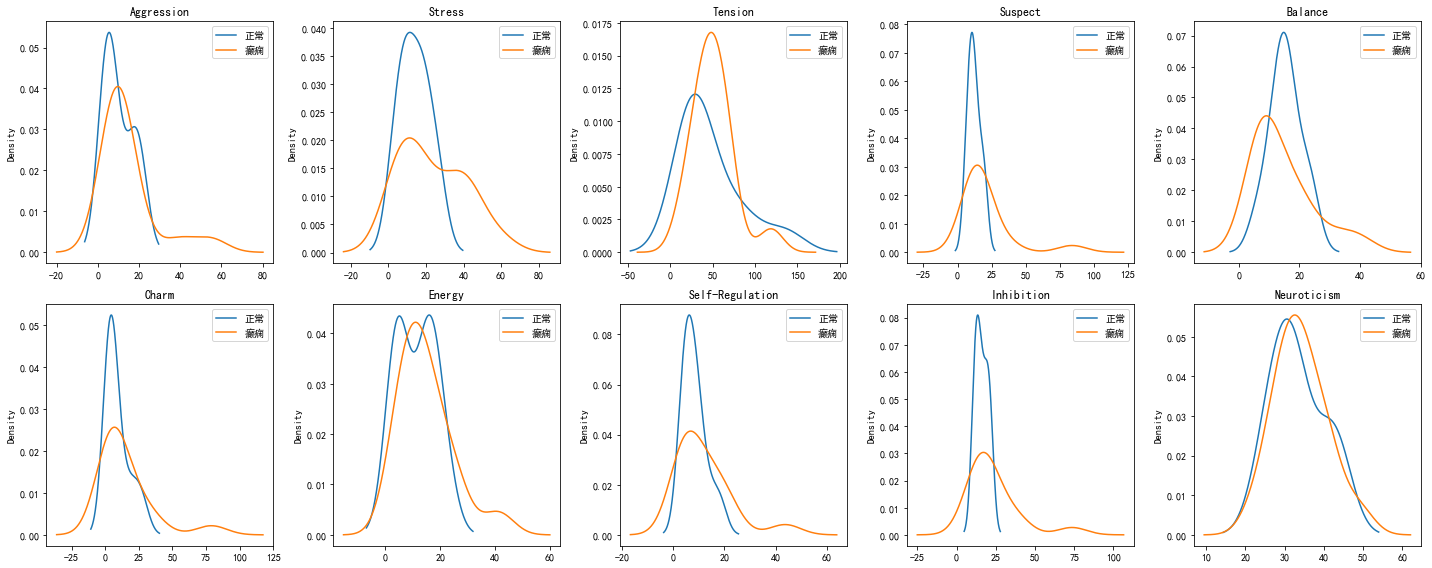

In [79]:
i = 1
plt.figure(figsize=[20,8])
for name in feature_name:
    plt.subplot(2,5,i)
    i += 1
    data_0[name].plot.kde()
    data_1[name].plot.kde()
    plt.title(name)
    plt.legend(["正常","癫痫"])
plt.tight_layout()
plt.show()

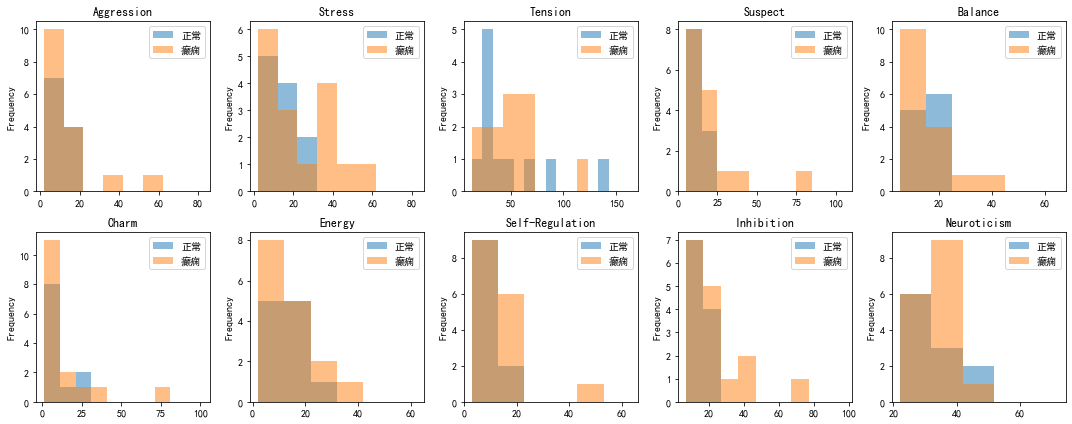

In [118]:
i = 1
bins_interval = 30
plt.figure(figsize=[15,6])
for name in feature_name:
    plt.subplot(2,5,i)
    i += 1
    bins = range(int(np.floor(min(data[name]))), int(np.ceil(max(data[name]))) + bins_interval - 1, 10)
    data_0[name].plot.hist(alpha=0.5, bins=bins)
    data_1[name].plot.hist(alpha=0.5, bins=bins)
    plt.title(name)
    plt.legend(["正常","癫痫"])
plt.tight_layout()
plt.show()

## 决策树计算和生成

In [137]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data[feature_name].values, data[label_name].values, test_size=0.3)
# Xtrain, Ytrain = data[feature_name].values, data[label_name].values

clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
print("test accuracy {:.2f}%".format(score*100))

dot_data = tree.export_graphviz(clf
                                ,feature_names= feature_name
                                ,class_names=["正常","癫痫"]
                                ,filled=True
                                ,rounded=True
                                ,out_file=None
                               )
graph = graphviz.Source(dot_data)
graph

## 特征降维可视化效果

In [83]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [84]:
tsne = TSNE(n_components=2, init='pca', random_state=0)
X = tsne.fit_transform(Xtrain)

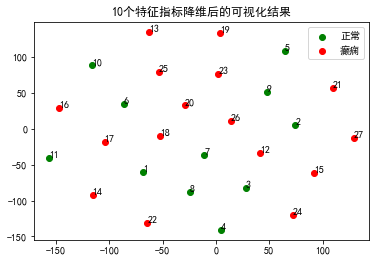

In [85]:
plt.scatter(X[:11,0], X[:11,1], c='g', label='正常')
plt.scatter(X[11:,0], X[11:,1], c='r', label='癫痫')
for i in range(X.shape[0]):
    plt.annotate(i+1, (X[i,0], X[i,1]))
plt.legend()
# plt.xlim(-1000, 1000)
# plt.ylim(-1000, 1000)
plt.title('10个特征指标降维后的可视化结果')
plt.show()

## 均值主导的分类指标计算

吕老师建议的6个主要指标：

In [87]:
feature = ['Aggression', 'Balance','Charm','Energy','Self-Regulation','Inhibition']

In [91]:
XX = data[feature]
XX_0 = XX[:11]
XX_1 = XX[11:]

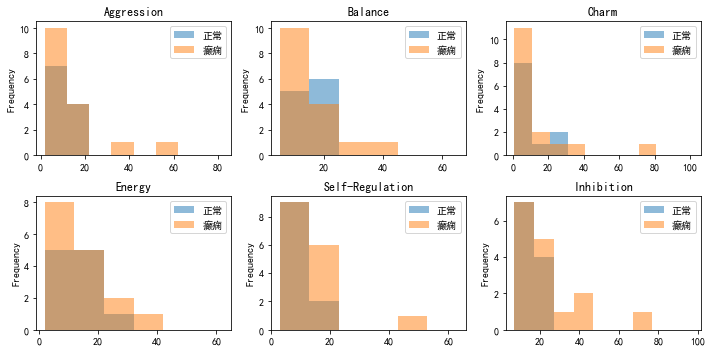

In [119]:
i = 1
bins_interval = 30
plt.figure(figsize=[10,5])
for name in feature:
    plt.subplot(2,3,i)
    i += 1
    bins = range(int(np.floor(min(data[name]))), int(np.ceil(max(data[name]))) + bins_interval - 1, 10)
    data_0[name].plot.hist(alpha=0.5, bins=bins)
    data_1[name].plot.hist(alpha=0.5, bins=bins)
    plt.title(name)
    plt.legend(["正常","癫痫"])
plt.tight_layout()
plt.show()

从上面6种特征的分布来看，“正常”和“癫痫”两类样本分布几乎重叠，很难找到明确的分界线。

# 小结
* 目前拿到的样本数是27个人，其中正常11人，癫痫患者16人，用视频振动影像的10类特征指标进行统计分析，可以发现，由于样本数量较少，两类的特征分布差异不明显，很难找到清晰的分界点。
* 同时，由于分布的重叠，降维后两类样本也没有很合适的聚类中心。
* 决策树分类容易造成过拟合（因为数据量较小）

## 山西检测数据处理

### 数据整理

In [15]:
import os
import openpyxl

In [19]:
path = ".\山西检测数据（全）"
foldlist = os.listdir(path)
filepaths = []
namelist = []
labellist = []
i = 1
for fold in foldlist:
    foldpath = os.path.join(path, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        filepath = os.path.join(foldpath, file)
        filepaths.append(filepath)
        labellist.append(fold)
        namelist.append(file[:-5])
        
example = openpyxl.load_workbook(filepaths[0])
column = [row[0] for row in example['M'].iter_rows(values_only=True)]
column = column[4:14]+column[19:]
column = ["M_" + col for col in column] + ["Vi_" + col for col in column]

C:\Users\yyy96\anaconda3\envs\ML\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [20]:
X = np.zeros((len(filepaths), 39*2))

for i, filepath in enumerate(filepaths):
    print("Loading----", i, ":", filepath)
    xl = openpyxl.load_workbook(filepath)
    data_M = [row[1] for row in xl['M'].iter_rows(values_only=True)]
    data_Vi = [row[3] for row in xl['M'].iter_rows(values_only=True)]
    data = data_M[4:14] + data_M[19:] + data_Vi[4:14] + data_Vi[19:]
    X[i,:] = data

Loading---- 0 : .\山西检测数据（全）\健康人员\2018-01-04 12_43_28_M.xlsx
Loading---- 1 : .\山西检测数据（全）\健康人员\2018-01-16 11_14_05_M.xlsx
Loading---- 2 : .\山西检测数据（全）\健康人员\2018-01-25 09_49_32_M.xlsx
Loading---- 3 : .\山西检测数据（全）\健康人员\2018-01-25 10_22_42_M.xlsx
Loading---- 4 : .\山西检测数据（全）\健康人员\2019-05-24 12_56_37_M.xlsm
Loading---- 5 : .\山西检测数据（全）\健康人员\任秀花.xlsx
Loading---- 6 : .\山西检测数据（全）\健康人员\安小婷.xlsx
Loading---- 7 : .\山西检测数据（全）\健康人员\张国庆.xlsx
Loading---- 8 : .\山西检测数据（全）\健康人员\王建平.xlsx
Loading---- 9 : .\山西检测数据（全）\健康人员\王桂莲.xlsx
Loading---- 10 : .\山西检测数据（全）\健康人员\白炜（辅）.xlsx
Loading---- 11 : .\山西检测数据（全）\健康人员\秦浩（辅）.xlsx
Loading---- 12 : .\山西检测数据（全）\健康人员\邓楠（辅）.xlsx
Loading---- 13 : .\山西检测数据（全）\双相\刘建荣.xlsm
Loading---- 14 : .\山西检测数据（全）\双相\姚常红.xlsm
Loading---- 15 : .\山西检测数据（全）\双相\张剑.xlsm
Loading---- 16 : .\山西检测数据（全）\双相\张欣宇.xlsm
Loading---- 17 : .\山西检测数据（全）\双相\李翔.xlsm
Loading---- 18 : .\山西检测数据（全）\双相\王林芝.xlsm
Loading---- 19 : .\山西检测数据（全）\双相\王薪华.xlsm
Loading---- 20 : .\山西检测数据（全）\双相\贾智伟.xlsm
Loading---- 21 : .\山西检测数据（全）\

In [21]:
df = pd.DataFrame(X, columns=column)
df["label"] = labellist
df.insert(0, '姓名', namelist)

df.to_csv("./山西数据M+Vi.csv", encoding="utf_8_sig")

### 数据读取

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [57]:
data = pd.read_csv("./山西数据M+Vi.csv", encoding='utf-8', index_col=0)

In [58]:
data = data.drop(labels=[30, 32, 56, 65, 85, 100])
data.index = range(data.shape[0])

In [59]:
feature_columns = list(data.columns[1:-1])
labelindex = {}
group = data.groupby("label")
labels = list(group.groups.keys())
for label in labels:
    labelindex[label] = data[data.label==label].index.to_list()

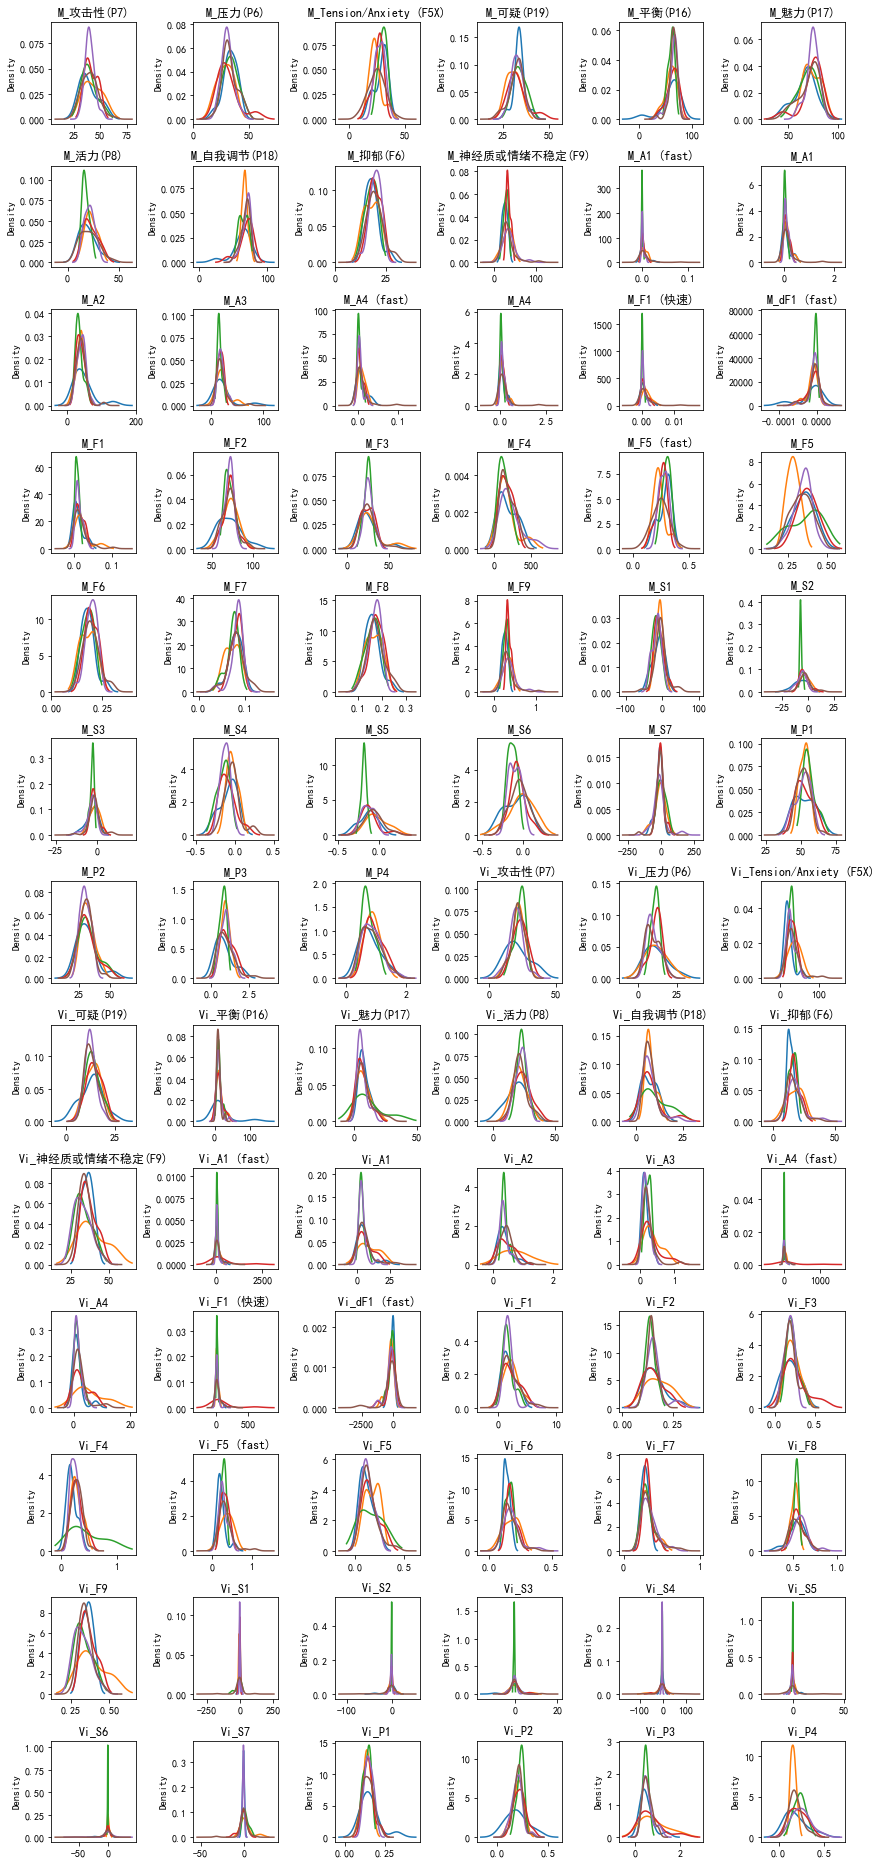

In [31]:
i = 1
plt.figure(figsize=[12,26])
for feature in feature_columns:
    plt.subplot(13,6,i)
    i += 1
    for label in labels:
        data_i = data.loc[labelindex[label]]
        data_i[feature].plot.kde()
    plt.title(feature)
#     plt.legend(labels)
plt.tight_layout()
plt.show()

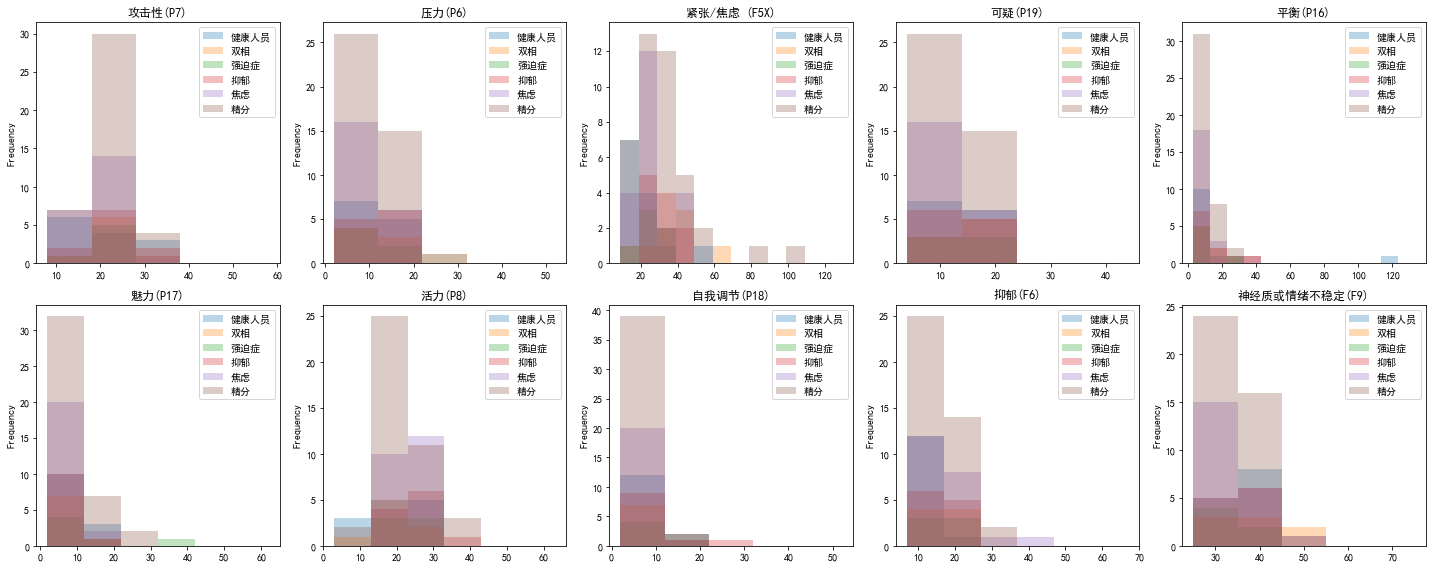

In [14]:
i = 1
bins_interval = 30
plt.figure(figsize=[20,8])
for feature in feature_columns:
    plt.subplot(2,5,i)
    i += 1
    bins = range(int(np.floor(min(data[feature]))), int(np.ceil(max(data[feature]))) + bins_interval - 1, 10)
    for label in labels:
        data_i = data.loc[labelindex[label]]
        data_i[feature].plot.hist(alpha=0.3, bins=bins)
    plt.title(feature)
    plt.legend(labels)
plt.tight_layout()
plt.show()

### 降维可视化

In [32]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [51]:
Xtrain = data[feature_columns].values
tsne = TSNE(n_components=2, init='pca', random_state=0)
X = tsne.fit_transform(Xtrain)

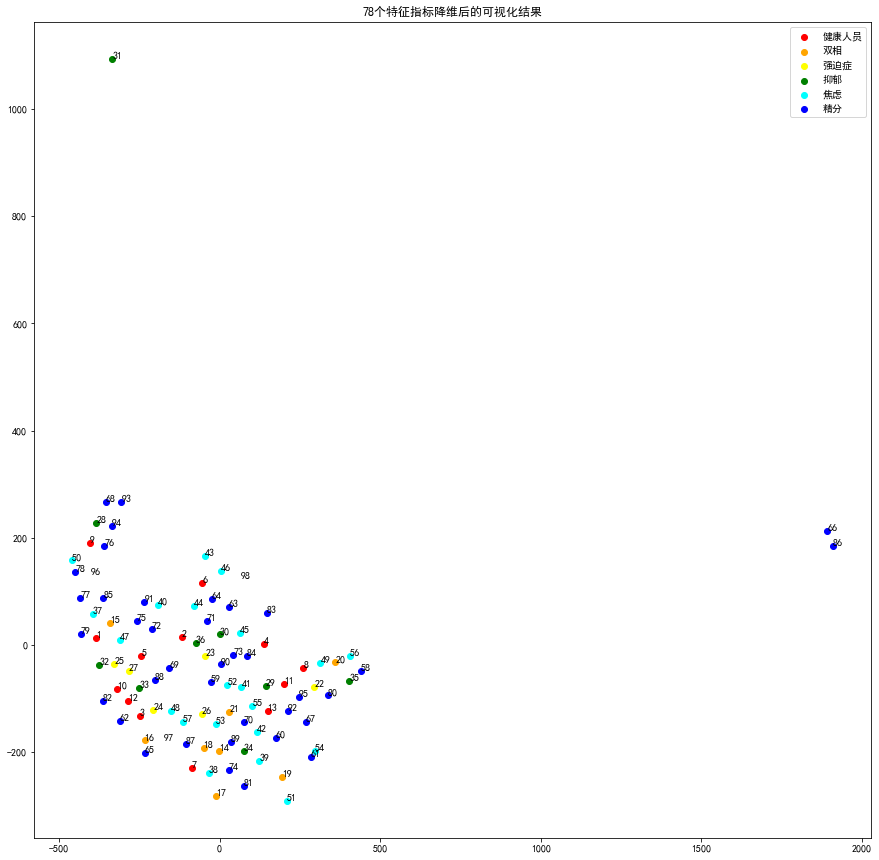

In [60]:
color = ['red','orange','yellow','green','cyan', 'blue','purple','pink','magenta','brown']
plt.figure(figsize=[15,15])
for i, label in enumerate(labels):
    plt.scatter(X[labelindex[label],0], X[labelindex[label],1], c=color[i], label=label)
for i in range(X.shape[0]):
    plt.annotate(i+1, (X[i,0], X[i,1]))
plt.legend()

plt.title('78个特征指标降维后的可视化结果')
plt.show()

### 统计特征可视化

### 决策树分类

In [119]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [135]:
label_name = "label"
data.label.replace(labels, list(range(6)), inplace=True)

test accuracy 50.00%


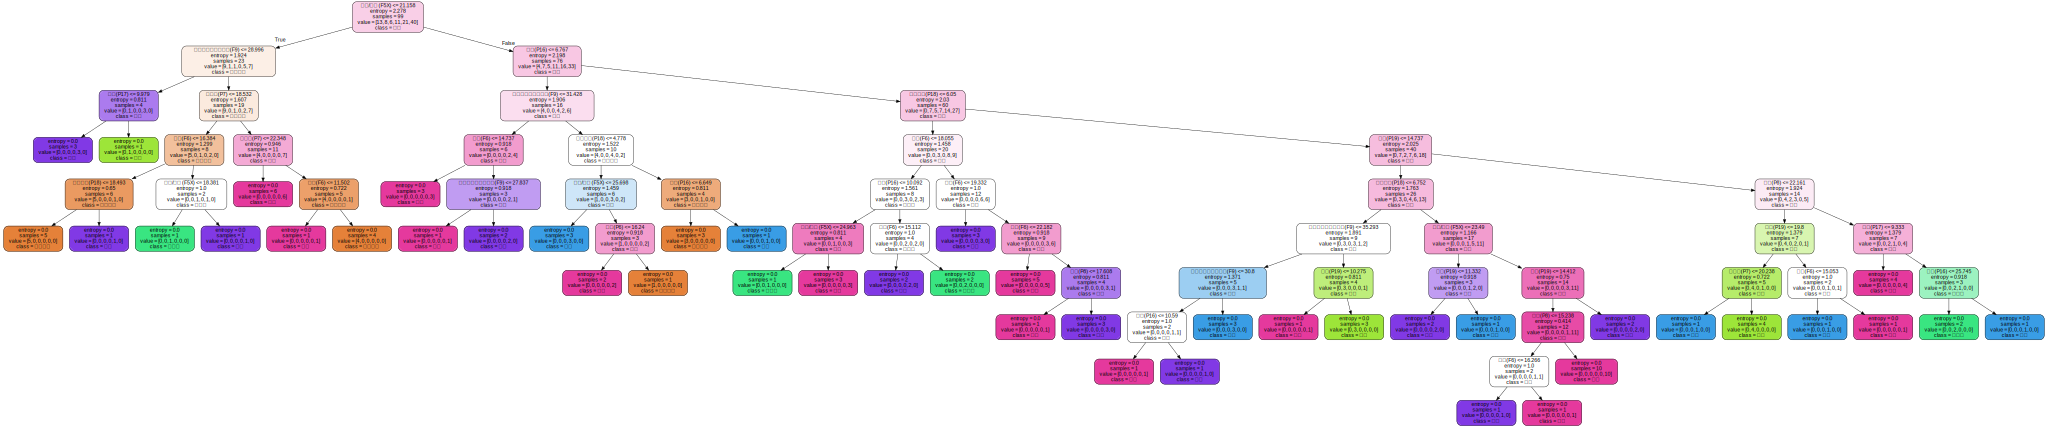

In [151]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data[feature_columns].values, data[label_name].values, test_size=0.01)
# Xtrain, Ytrain = data[feature_name].values, data[label_name].values

clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
print("test accuracy {:.2f}%".format(score*100))

dot_data = tree.export_graphviz(clf
                                ,feature_names= feature_columns
                                ,class_names=labels
                                ,filled=True
                                ,rounded=True
                                ,out_file=None
                               )
graph = graphviz.Source(dot_data)
graph

## 癫痫数据整理

In [22]:
import os
import openpyxl
import numpy as np
import pandas as pd

In [5]:
path = ".\癫痫数据"
foldlist = os.listdir(path)
filepaths = []
namelist = foldlist
i = 1
for fold in foldlist:
    foldpath = os.path.join(path, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        if file[-4:] == "xlsm":
            filepath = os.path.join(foldpath, file)
            filepaths.append(filepath)
        


In [18]:
example = openpyxl.load_workbook(filepaths[0])
column = [row[0] for row in example['M'].iter_rows(values_only=True)]
column = column[:48]
column = column[4:14]+column[19:]
column = ["M_" + col for col in column] + ["Vi_" + col for col in column]

C:\Users\yyy96\anaconda3\envs\ML\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [19]:
X = np.zeros((len(filepaths), 39*2))

for i, filepath in enumerate(filepaths):
    print("Loading----", i, ":", filepath)
    xl = openpyxl.load_workbook(filepath)
    data_M = [row[1] for row in xl['M'].iter_rows(values_only=True)]
    data_Vi = [row[3] for row in xl['M'].iter_rows(values_only=True)]
    data_M = data_M[:48]
    data_Vi = data_Vi[:48]
    data = data_M[4:14] + data_M[19:] + data_Vi[4:14] + data_Vi[19:]
    X[i,:] = data

Loading---- 0 : .\癫痫数据\33床XXX\2020-08-12 20_03_14_M.xlsm
Loading---- 1 : .\癫痫数据\38床 XXX\2020-08-12 20_06_32_M.xlsm
Loading---- 2 : .\癫痫数据\刘双杰\2020-08-12 20_08_19_M.xlsm
Loading---- 3 : .\癫痫数据\吴绍汘\2020-08-12 20_51_40_M.xlsm
Loading---- 4 : .\癫痫数据\姚沛辰\2020-08-12 21_01_28_M.xlsm
Loading---- 5 : .\癫痫数据\孙俊伟\2020-08-12 20_32_15_M.xlsm
Loading---- 6 : .\癫痫数据\孙敬轩\2020-08-12 20_30_48_M.xlsm
Loading---- 7 : .\癫痫数据\孟庆儒？\2020-08-12 20_29_12_M.xlsm
Loading---- 8 : .\癫痫数据\安天琛（最佳）\2020-08-12 20_12_18_M.xlsm
Loading---- 9 : .\癫痫数据\张琬宁\2020-08-12 21_07_04_M.xlsm
Loading---- 10 : .\癫痫数据\张瑾艺\2020-08-12 21_04_12_M.xlsm
Loading---- 11 : .\癫痫数据\张超\2020-08-07 10_11_38_M.xlsm
Loading---- 12 : .\癫痫数据\徐芮熙\2020-08-12 20_57_41_M.xlsm
Loading---- 13 : .\癫痫数据\朱家起\2020-08-12 21_09_52_M.xlsm
Loading---- 14 : .\癫痫数据\李金武\2020-08-12 20_16_51_M.xlsm
Loading---- 15 : .\癫痫数据\李雨轩\2020-08-12 20_20_55_M.xlsm
Loading---- 16 : .\癫痫数据\李龙奎\2020-08-12 20_19_32_M.xlsm
Loading---- 17 : .\癫痫数据\段雨航\2020-08-12 20_14_38_M.xlsm
Loading--

In [23]:
df = pd.DataFrame(X, columns=column)
df.insert(0, '姓名', namelist)

df.to_csv("./癫痫数据M+Vi.csv", encoding="utf_8_sig")

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
data = pd.read_csv("./癫痫数据M+Vi.csv", encoding='utf-8', index_col=0)

In [4]:
feature_columns = list(data.columns[1:-1])
labelindex = {}
group = data.groupby("label")
labels = list(group.groups.keys())
for label in labels:
    labelindex[label] = data[data.label==label].index.to_list()

KeyError: 'label'